In [23]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR, draw_ocr

In [24]:
model = YOLO(r'D:\DIP\Vietnam license-plate.v1i.yolov8\license_plate_detector.pt')

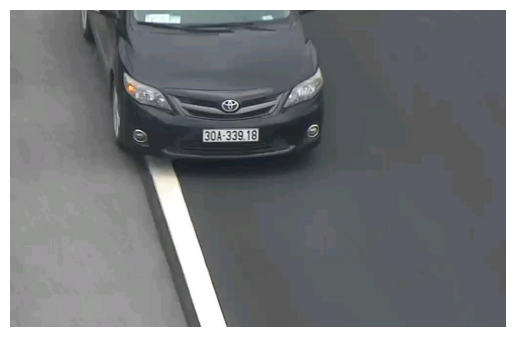

In [25]:
image_path = r"D:\DIP\License-Plate-Recognition-main\License-Plate-Recognition-main\test_image\3.jpg"
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [26]:
results = model(image)


0: 416x640 1 license_plate, 125.6ms
Speed: 0.0ms preprocess, 125.6ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)


In [27]:
regions = []

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        roi = image[y1:y2, x1:x2]
        regions.append(roi)

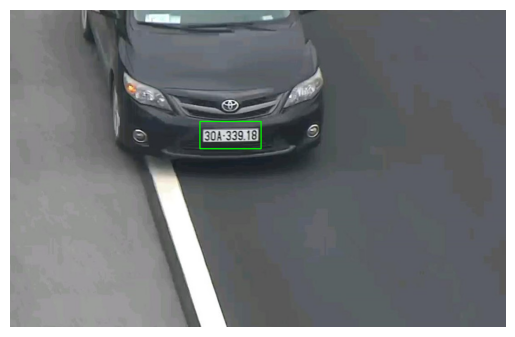

In [28]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

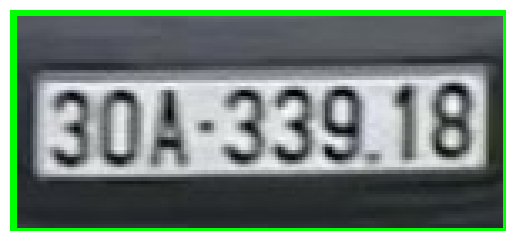

In [29]:
for roi in regions:
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [30]:
ocr = PaddleOCR(use_angle_cls=True, lang='en')

[2024/12/28 15:16:11] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\qazzx/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\qazzx/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thre

In [31]:
results = ocr.ocr(roi, cls=True)
for line in results[0]:
    print(f"Detected text: {line[1][0]}, Confidence: {line[1][1]}")

[2024/12/28 15:16:13] ppocr DEBUG: dt_boxes num : 1, elapse : 0.04434061050415039
[2024/12/28 15:16:13] ppocr DEBUG: cls num  : 1, elapse : 0.02487349510192871
[2024/12/28 15:16:13] ppocr DEBUG: rec_res num  : 1, elapse : 0.030593395233154297
Detected text: 30A-339.18, Confidence: 0.9764320254325867
